# 1. Popularity Based Recommendation System

## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



In [75]:
import numpy as np  
import pandas as pd
import seaborn as sns

### Q1. Read the data (jokes.csv)

In [2]:
jokes_df = pd.read_csv("C:\\Users\\Sasikumar Bala\\JupyterWorkspace\\Internal_Lab\\Recommendation_System\\jokes.csv")

In [3]:
jokes_df.sample(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
21811,50,99.00,99.00,99.00,99.00,0.87,4.22,-0.34,-3.59,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
10213,72,2.18,5.05,7.62,6.21,0.58,4.81,-3.54,-4.90,6.12,...,99.00,99.00,99.00,6.70,99.00,99.00,99.00,99.00,99.00,99.00
18524,72,3.45,-1.65,-3.40,2.72,-3.40,2.52,-4.76,5.44,-2.91,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
12998,72,-7.43,-9.22,-7.43,-7.48,-3.64,-5.68,-4.56,-9.22,-7.48,...,99.00,99.00,99.00,99.00,99.00,99.00,-9.32,99.00,99.00,99.00
3519,59,99.00,99.00,99.00,99.00,-9.47,-9.81,-9.81,-9.03,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,-0.39,99.00,99.00,99.00
17607,100,-6.36,-5.63,-6.60,-5.92,5.83,-7.38,-5.44,-5.92,-5.92,...,-5.58,-6.07,-5.83,-5.49,-5.44,-5.44,-5.44,-5.49,-5.44,-3.59
23150,100,-1.70,-2.18,-1.02,-0.49,-6.41,-0.49,-3.88,1.02,-2.28,...,4.47,1.60,0.92,2.28,2.77,1.21,1.84,-2.48,-0.34,-3.45
6788,90,1.02,6.84,-5.97,-3.45,2.09,0.92,1.89,0.49,0.83,...,6.75,6.75,8.20,1.84,1.70,3.16,0.78,5.39,5.97,4.27
5499,100,-6.46,-4.76,-1.46,-6.80,-2.96,1.17,-7.52,1.89,-6.65,...,3.06,-6.60,3.69,-6.02,-2.72,1.65,8.40,7.67,4.71,-6.36
8123,38,99.00,99.00,99.00,99.00,0.63,99.00,9.37,5.44,99.00,...,6.75,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [4]:
jokes_df.shape

(24983, 101)

In [5]:
jokes_df.dtypes

NumJokes      int64
Joke1       float64
Joke2       float64
Joke3       float64
Joke4       float64
             ...   
Joke96      float64
Joke97      float64
Joke98      float64
Joke99      float64
Joke100     float64
Length: 101, dtype: object

### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only

In [6]:
ratings = jokes_df.iloc[0:200,1:]

In [7]:
ratings.head(10)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [8]:
ratings.shape

(200, 100)

### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [9]:
if(ratings.isnull().sum().any()):
    print('There are null values in the dataset')
else:
    print('There are no null values in the dataset')

There are no null values in the dataset


In [10]:
# As mentioned earlier 99 is the not rated value Which means null, We are replacing it with  0.

ratings.replace(99,0,inplace=True)

### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [11]:
ratings_mean_count = ratings.mean()

In [12]:
ratings_mean_count

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
            ...   
Joke96     0.41755
Joke97     0.75500
Joke98     0.09370
Joke99     0.13500
Joke100    0.52440
Length: 100, dtype: float64

### Q5. List most popular 10 jokes

In [13]:
ratings_mean_count.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

<font color = darkblue>

# Observation
   - From the above popularity base technique, We are seeing the top most rated joke is Joke50. Below are the Top 10 most rated Jokes.
     - Joke50
     - Joke36
     - Joke53
     - Joke35
     - Joke29
     - Joke27
     - Joke62
     - Joke49
     - Joke32
     - Joke31

#2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify

In [235]:
books = pd.read_csv("C:\\Users\\Sasikumar Bala\\JupyterWorkspace\\Internal_Lab\\Recommendation_System\\BX-Books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('C:\\Users\\Sasikumar Bala\\JupyterWorkspace\\Internal_Lab\\Recommendation_System\\BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('C:\\Users\\Sasikumar Bala\\JupyterWorkspace\\Internal_Lab\\Recommendation_System\\BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [236]:
books.sample(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
208308,1588512215,The Prince's Bride,Lori Avocato,2001,Publishamerica,http://images.amazon.com/images/P/1588512215.0...,http://images.amazon.com/images/P/1588512215.0...,http://images.amazon.com/images/P/1588512215.0...
109511,0060972866,Chronic fatigue syndrome: The hidden epidemic,Jesse A Stoff,1990,Perennial Library,http://images.amazon.com/images/P/0060972866.0...,http://images.amazon.com/images/P/0060972866.0...,http://images.amazon.com/images/P/0060972866.0...
9491,0070064601,Family: The Ties That Bind and Gag!,Erma Bombeck,1987,McGraw-Hill Companies,http://images.amazon.com/images/P/0070064601.0...,http://images.amazon.com/images/P/0070064601.0...,http://images.amazon.com/images/P/0070064601.0...
163770,0312044569,"Journey into Summer (American Seasons, 2nd Sea...",Edwin Way Teale,1990,St Martins Pr,http://images.amazon.com/images/P/0312044569.0...,http://images.amazon.com/images/P/0312044569.0...,http://images.amazon.com/images/P/0312044569.0...
88763,051757098X,Love/Penhaligion's Scented Treasury of Verse a...,Sheila Pickles,1988,Harmony Books,http://images.amazon.com/images/P/051757098X.0...,http://images.amazon.com/images/P/051757098X.0...,http://images.amazon.com/images/P/051757098X.0...
216597,1581651422,Roses for Mama,Janette Oke,1991,Bethany House,http://images.amazon.com/images/P/1581651422.0...,http://images.amazon.com/images/P/1581651422.0...,http://images.amazon.com/images/P/1581651422.0...
109509,0060188650,Son of a Grifter: The Twisted Tale of Sante an...,Kent Walker,2001,William Morrow &amp; Company,http://images.amazon.com/images/P/0060188650.0...,http://images.amazon.com/images/P/0060188650.0...,http://images.amazon.com/images/P/0060188650.0...
105969,0453005888,Maggie's American Dream: The Life and Times of...,James P. Comer,1988,New Amer Library,http://images.amazon.com/images/P/0453005888.0...,http://images.amazon.com/images/P/0453005888.0...,http://images.amazon.com/images/P/0453005888.0...
9734,0060191538,"Perfect Murder, Perfect Town",Lawrence Schiller,1999,Harpercollins,http://images.amazon.com/images/P/0060191538.0...,http://images.amazon.com/images/P/0060191538.0...,http://images.amazon.com/images/P/0060191538.0...
244571,0671836765,MARQUIS TAKE BRIDE (Cotillion Regency Romance),Helen Crampton,1980,Pocket,http://images.amazon.com/images/P/0671836765.0...,http://images.amazon.com/images/P/0671836765.0...,http://images.amazon.com/images/P/0671836765.0...


In [237]:
users.head(10)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [238]:
ratings.head(10)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [239]:
# 1.Check shape of all the datasets

print(ratings.shape)
print(users.shape)
print(books.shape)

(1149780, 3)
(278858, 3)
(271360, 8)


In [240]:
# 2. Print Columns in all the datasets

print('Columns of Book - ',books.columns)
print('Columns of Users - ',users.columns)
print('Columns of Ratings - ',ratings.columns)

Columns of Book -  Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')
Columns of Users -  Index(['userID', 'Location', 'Age'], dtype='object')
Columns of Ratings -  Index(['userID', 'ISBN', 'bookRating'], dtype='object')


In [241]:
# 3.Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify

books.drop(['imageUrlS','imageUrlM','imageUrlL'],inplace= True,axis=1)

In [242]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')

# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)

In [22]:
# 1. Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)

ratings_new = ratings[ratings['ISBN'].isin(books['ISBN'])]

In [23]:
ratings_new.head(10)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
8,276744,038550120X,7
10,276746,0425115801,0
11,276746,0449006522,0
12,276746,0553561618,0


In [24]:
ratings_new.shape

(1031136, 3)

In [243]:
# 2. Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)

ratings_new = ratings_new[ratings_new['userID'].isin(users['userID'])]

In [26]:
ratings_new.head(10)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
8,276744,038550120X,7
10,276746,0425115801,0
11,276746,0449006522,0
12,276746,0553561618,0


In [27]:
ratings_new.shape

(1031136, 3)

# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [28]:
ratings_new['bookRating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: bookRating, dtype: int64

In [29]:
ratings_explicit = ratings_new[ratings_new['bookRating'] != 0]

In [30]:
ratings_explicit.shape

(383842, 3)

In [31]:
ratings_explicit['bookRating'].value_counts()

8     91804
10    71225
7     66402
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

<AxesSubplot:xlabel='bookRating', ylabel='count'>

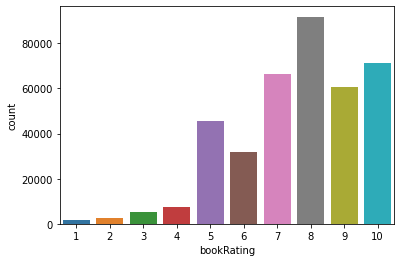

In [34]:
sns.countplot(x='bookRating',data=ratings_explicit)

<font color = darkblue>

# Observation
   - From the above Distribution, We can see the most ratings are of bookRating 8
   - Most of the Books are Ratings above 5.
   - Surprisingly there are ~65k users rated 10 and ~58k users rated 9 for some of the books

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format

In [65]:
# 1. Consider Users Who have rated atleast 100 Books

counts = ratings_explicit['userID'].value_counts()

In [66]:
rating_100_books = ratings_explicit[ratings_explicit['userID'].isin(counts[counts >= 100].index)]

In [67]:
rating_100_books.shape

(103271, 3)

In [68]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [69]:
data = Dataset.load_from_df(rating_100_books[['userID','ISBN','bookRating']],reader =reader)

In [70]:
type(data)

surprise.dataset.DatasetAutoFolds

In [71]:
type(data.df)

pandas.core.frame.DataFrame

In [72]:
data.df

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
...,...,...,...
1147587,275970,185649814X,7
1147592,275970,1860462588,8
1147599,275970,1886411077,6
1147611,275970,3411086211,10


# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




In [74]:
## Train and Test Split from surprise Package.
from surprise.model_selection import train_test_split

train_set,test_set = train_test_split(data,test_size= 0.25,random_state= 15)

In [83]:
from surprise import SVD
from surprise import accuracy
from surprise import Prediction

svd_model = SVD(n_epochs=50)
svd_model.fit(train_set)

In [84]:
test_prediction = svd_model.test(test_set)

In [103]:
test_prediction

[Prediction(uid=162639, iid='075820230X', r_ui=9.0, est=8.362654832367287, details={'was_impossible': False}),
 Prediction(uid=76499, iid='0745319173', r_ui=10.0, est=8.74579380199193, details={'was_impossible': False}),
 Prediction(uid=234359, iid='0060558121', r_ui=10.0, est=6.470888665059666, details={'was_impossible': False}),
 Prediction(uid=75591, iid='0688221149', r_ui=10.0, est=8.2700595105222, details={'was_impossible': False}),
 Prediction(uid=158433, iid='185158823X', r_ui=7.0, est=7.813640373286238, details={'was_impossible': False}),
 Prediction(uid=189835, iid='0838315291', r_ui=5.0, est=5.187486771720369, details={'was_impossible': False}),
 Prediction(uid=268110, iid='0451205618', r_ui=7.0, est=7.108129142880372, details={'was_impossible': False}),
 Prediction(uid=11676, iid='0553158473', r_ui=9.0, est=7.392081898312262, details={'was_impossible': False}),
 Prediction(uid=93363, iid='1578565480', r_ui=10.0, est=7.877201596716063, details={'was_impossible': False}),
 Pre

In [85]:
accuracy.rmse(test_prediction)

RMSE: 1.4996


1.4995503487918196

# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [157]:
predicted = pd.DataFrame(test_prediction)

In [158]:
predicted.head(10)

,uid,iid,r_ui,est,details
0,162639,075820230X,9.0,8.362655,{'was_impossible': False}
1,76499,0745319173,10.0,8.745794,{'was_impossible': False}
2,234359,0060558121,10.0,6.470889,{'was_impossible': False}
3,75591,0688221149,10.0,8.270060,{'was_impossible': False}
4,158433,185158823X,7.0,7.813640,{'was_impossible': False}
5,189835,0838315291,5.0,5.187487,{'was_impossible': False}
6,268110,0451205618,7.0,7.108129,{'was_impossible': False}
7,11676,0553158473,9.0,7.392082,{'was_impossible': False}
8,93363,1578565480,10.0,7.877202,{'was_impossible': False}
9,38273,0836218833,10.0,7.793496,{'was_impossible': False}


In [228]:
def get_recommendations(userId,n):
    recomm = predicted[predicted['uid']== userId][['uid','iid','est']].sort_values(by = 'est',ascending= False).head(n)
    return recomm

In [230]:
recommendations = get_recommendations(95902,10)

In [231]:
recommendations

,uid,iid,est
21731,95902,8472238857,7.074124
153,95902,8483107740,7.022830
17069,95902,8437501709,7.022830
14300,95902,8433908898,7.022830
14732,95902,8420428485,7.022830
14976,95902,8448301927,7.022830
15757,95902,8433908812,7.022830
16830,95902,8485704711,7.022830
16845,95902,8482567365,7.022830
18038,95902,8483071053,7.022830


In [232]:
print("Below are few recommendations")
for i in range(len(np.array(recommendations))):
    print('User Id - ',np.array(recommendations)[i][0],' has the similar book id ',np.array(recommendations)[i][1],' With estimated Rating as -',np.array(recommendations)[i][2])

Below are few recommendations
User Id -  95902  has the similar book id  8472238857  With estimated Rating as - 7.074123570649177
User Id -  95902  has the similar book id  8483107740  With estimated Rating as - 7.022829860546486
User Id -  95902  has the similar book id  8437501709  With estimated Rating as - 7.022829860546486
User Id -  95902  has the similar book id  8433908898  With estimated Rating as - 7.022829860546486
User Id -  95902  has the similar book id  8420428485  With estimated Rating as - 7.022829860546486
User Id -  95902  has the similar book id  8448301927  With estimated Rating as - 7.022829860546486
User Id -  95902  has the similar book id  8433908812  With estimated Rating as - 7.022829860546486
User Id -  95902  has the similar book id  8485704711  With estimated Rating as - 7.022829860546486
User Id -  95902  has the similar book id  8482567365  With estimated Rating as - 7.022829860546486
User Id -  95902  has the similar book id  8483071053  With estimated 